In [16]:
# general purpose:
import os

# for audio operations:
from pydub import AudioSegment
import wave
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# 
def save_mp3_as_wav(data_dir, mp3_filename, save_to_dir):
    mp3_file_abs_path = os.path.join(data_dir, mp3_filename)
    save_wav_file_as = os.path.join(save_to_dir, f"{mp3_filename.replace('.mp3', '.wav')}")
    sound = AudioSegment.from_mp3(mp3_file_abs_path)
    sound.export(save_wav_file_as, format="wav")

In [7]:
# save tmp LIE file for experiments:
save_mp3_as_wav(data_dir="../../../data/audio_data/",
                mp3_filename="trial_lie_048_006.mp3",
                save_to_dir=os.getcwd())

In [20]:
# save tmp TRUTH file for experiments:
save_mp3_as_wav(data_dir="../../../data/audio_data/",
                mp3_filename="trial_truth_054_002.mp3",
                save_to_dir=os.getcwd())

In [27]:
def show_audio_features(wav_abs_path, title):
    # Open wav file and read frames as bytes
    sf_filewave = wave.open(wav_abs_path, 'r')  # 'trial_lie_048_006.wav', 'r')
    signal_sf = sf_filewave.readframes(-1)
    # Convert audio bytes to integers
    soundwave_sf = np.frombuffer(signal_sf, dtype='int16')
    # Get the sound wave frame rate
    framerate_sf = sf_filewave.getframerate()
    # Find the sound wave timestamps
    time_sf = np.linspace(start=0,
                          stop=len(soundwave_sf)/framerate_sf,
                          num=len(soundwave_sf))
    # Set up plot
    f, ax = plt.subplots(figsize=(15, 3))
    # Setup the title and axis titles
    plt.title('Amplitude over Time')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (seconds)')
    # Add the audio data to the plot
    plt.plot(time_sf, soundwave_sf, label=title, alpha=0.5)
    plt.legend()
    plt.show()
    
    print("soundwave_sf.shape:", soundwave_sf.shape)

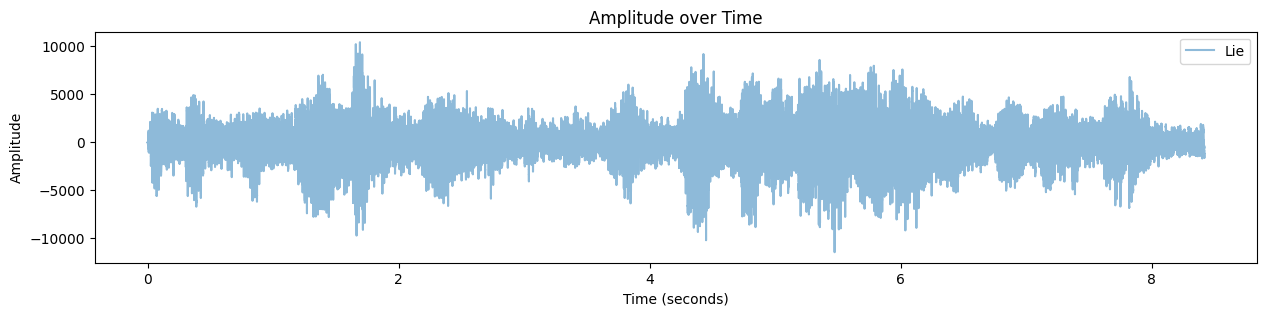

soundwave_sf.shape: (371322,)


In [28]:
show_audio_features(wav_abs_path="trial_lie_048_006.wav", title="Lie")

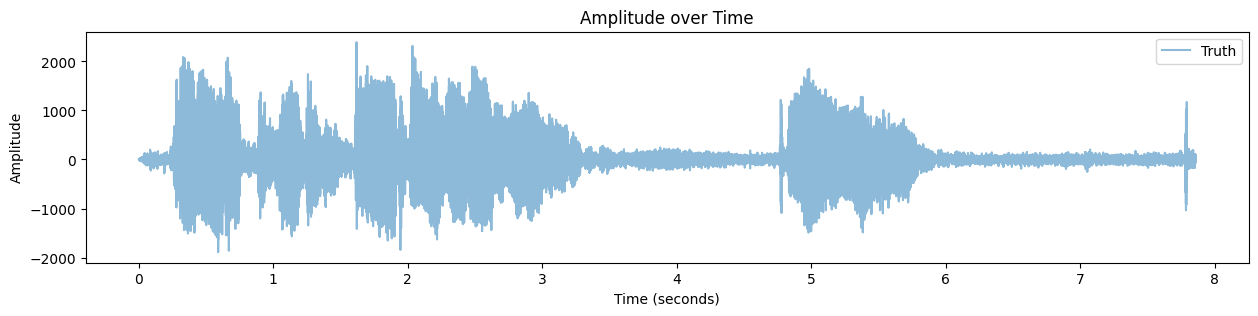

soundwave_sf.shape: (346626,)


In [29]:
show_audio_features(wav_abs_path="trial_truth_054_002.wav", title="Truth")

In [1]:
# https://stackoverflow.com/questions/20730133/extracting-pitch-features-from-audio-file

In [3]:
from bregman.suite import Chromagram

ModuleNotFoundError: No module named 'bregman'

In [2]:
audio_file = "../../data/audio_data/trial_lie_048_006.mp3"  # mono_file.wav"
F = Chromagram(audio_file, nfft=16384, wfft=8192, nhop=2205)
F.X # all chroma features
F.X[:,0] # one feature

NameError: name 'Chromagram' is not defined